### Título: Proyecto final de asignatura (2.2: Clasificación)
### Autores: Grupo 2 
### Asignatura: Aprendizaje Automático

**Clasificación**: se pretende clasificar a los estudiantes en dos grupos, aquellos que van a obtener
una beca y aquellos que no. 
 
La política del centro es ofrecer becas a aquellos estudiantes que
tengan un rendimiento académico excepcional, en este caso aquellos que obtengan una nota final
superior al percentil 90 de la distribución de notas.

### Importaciones

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as ply
import plotly.express as px
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
import joblib 
import shap 

In [2]:
df = pd.read_csv('DF3.0_proy_escuela_eda_clasificacion.csv')
df.head()

,tiempo_estudio,nota1,nota2,razon_rep,beca
0,1.270781,0.881372,0.750552,-0.543607,0
1,1.270781,0.881372,0.750552,-0.543607,0
2,-1.130557,-1.287754,-1.250920,-0.543607,0
3,0.070112,0.881372,0.083395,1.839565,0
4,0.070112,-0.203191,-0.583763,-0.543607,0


In [3]:
# Partición de los datos
X = df.drop('beca', axis=1)
y = df['beca']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Justificación para Usar los Modelos Seleccionados

#### 1. Random Forest

**Descripción**: Random Forest es un conjunto de árboles de decisión que combina las predicciones de múltiples árboles para obtener una predicción más robusta.

**Ventajas**:
- **Alto rendimiento**: Excelente rendimiento en problemas de clasificación complejos.
- **Manejo de no linealidad**: Captura eficientemente relaciones no lineales.
- **Reducción de overfitting**: La combinación de múltiples árboles reduce el sobreajuste.

**Desventajas**:
- **Interpretabilidad reducida**: La combinación de múltiples árboles dificulta la interpretación.

#### 2. Linear Discriminant Analysis (LDA)

**Descripción**: LDA es una técnica que busca encontrar una combinación lineal de características que caracteriza o separa dos o más clases.

**Ventajas**:
- **Reducción de dimensionalidad**: Puede reducir la dimensionalidad manteniendo la capacidad discriminativa.
- **Interpretabilidad**: Proporciona coeficientes interpretables para cada característica.
- **Eficiencia computacional**: Rápido de entrenar y predecir.

**Desventajas**:
- **Supuestos de normalidad**: Asume que los datos siguen una distribución normal.
- **Limitaciones lineales**: Solo puede encontrar combinaciones lineales de características.

#### 3. Logistic Regression

**Descripción**: Modelo lineal que estima la probabilidad de pertenencia a una clase mediante una función logística.

**Ventajas**:
- **Simplicidad**: Fácil de implementar y entender.
- **Interpretabilidad**: Los coeficientes tienen una interpretación clara.
- **Eficiencia**: Rápido de entrenar y hacer predicciones.

**Desventajas**:
- **Limitaciones lineales**: Asume relaciones lineales entre variables.
- **Rendimiento limitado**: Puede no capturar patrones complejos.

### Conclusión

Esta combinación de modelos ofrece un equilibrio entre:
- Capacidad predictiva (Random Forest)
- Reducción de dimensionalidad e interpretabilidad (LDA)
- Simplicidad y eficiencia (Logistic Regression)

La comparación de estos tres modelos permitirá:
1. Evaluar si las relaciones son principalmente lineales (LDA y Logistic Regression)
2. Identificar si existen patrones más complejos (Random Forest)
3. Determinar la importancia relativa de las características

### Random Forest

In [4]:
# Entrenamiento del modelo de Random Forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [5]:
y_pred_rf = clf.predict(X_test)

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

# Evaluar el modelo utilizando métricas de rendimiento para clasificación
# Calculamos Accuracy, Precision, Recall y F1-Score en el conjunto de prueba
# Validación cruzada para evaluar la robustez del modelo
# Utilizamos validación cruzada con 5 particiones (cv=5) y diferentes métricas

# La validación cruzada ayuda a evaluar la capacidad del modelo para generalizar
scores_accuracy_rf = cross_val_score(clf, X, y, cv=5, n_jobs=-1, scoring='accuracy')
scores_precision_rf = cross_val_score(clf, X, y, cv=5, n_jobs=-1, scoring='precision')
scores_recall_rf = cross_val_score(clf, X, y, cv=5, n_jobs=-1, scoring='recall')
scores_f1_rf = cross_val_score(clf, X, y, cv=5, n_jobs=-1, scoring='f1')

# Calculamos el las métricas de rendimiento
print('Accuracy:', scores_accuracy_rf.mean()) # Usamos la media de los valores obtenidos en las 5 particiones
print('Precision:', scores_precision_rf.mean()) 
print('Recall:', scores_recall_rf.mean())
print('F1-Score:', scores_f1_rf.mean())


Accuracy: 0.9653211009174312
Precision: 0.8447619047619046
Recall: 0.7444444444444444
F1-Score: 0.7860509115927072


In [7]:
## Random Forest
# Definición del espacio de búsqueda
param_grid_rf = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [None, 10, 20, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['sqrt', 'log2']
}

# Configuración de GridSearchCV
grid_search_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

# Ajuste del modelo
grid_search_rf.fit(X_train, y_train)

mejores_parametros_rf = grid_search_rf.best_params_
mejor_modelo_rf = grid_search_rf.best_estimator_
# Imprimir resultados
print("Mejores parámetros para Random Forest:")
print(mejores_parametros_rf)

Mejores parámetros para Random Forest:
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100}


In [35]:
# Evaluar el mejor modelo en el conjunto de prueba
y_pred_rf_mejorado = grid_search_rf.best_estimator_.predict(X_test)

# Calcular métricas para el modelo mejorado con validación cruzada
accuracy_rf_mejorado = cross_val_score(mejor_modelo_rf, X, y, cv=5, n_jobs=-1, scoring='accuracy').mean()
precision_rf_mejorado = cross_val_score(mejor_modelo_rf, X, y, cv=5, n_jobs=-1, scoring='precision').mean()
recall_rf_mejorado = cross_val_score(mejor_modelo_rf, X, y, cv=5, n_jobs=-1, scoring='recall').mean()
f1_rf_mejorado = cross_val_score(mejor_modelo_rf, X, y, cv=5, n_jobs=-1, scoring='f1').mean()

# Mostrar las nuevas métricas
print("\nMétricas del modelo Random Forest mejorado:")
print(f"Accuracy: {accuracy_rf_mejorado:.4f}")
print(f"Precision: {precision_rf_mejorado:.4f}")
print(f"Recall: {recall_rf_mejorado:.4f}")
print(f"F1-Score: {f1_rf_mejorado:.4f}")

# Calcular el porcentaje de mejora
accuracy_mejora = ((accuracy_rf_mejorado - scores_accuracy_rf.mean()) / scores_accuracy_rf.mean()) * 100
precision_mejora = ((precision_rf_mejorado - scores_precision_rf.mean()) / scores_precision_rf.mean()) * 100
recall_mejora = ((recall_rf_mejorado - scores_recall_rf.mean()) / scores_recall_rf.mean()) * 100
f1_mejora = ((f1_rf_mejorado - scores_f1_rf.mean()) / scores_f1_rf.mean()) * 100

print("\nPorcentaje de mejora tras la optimización:")
print(f"Mejora en Accuracy: {'+' if accuracy_mejora > 0 else ''}{accuracy_mejora:.2f}%")
print(f"Mejora en Precision: {'+' if precision_mejora > 0 else ''}{precision_mejora:.2f}%")
print(f"Mejora en Recall: {'+' if recall_mejora > 0 else ''}{recall_mejora:.2f}%")
print(f"Mejora en F1-Score: {'+' if f1_mejora > 0 else ''}{f1_mejora:.2f}%")


Métricas del modelo Random Forest mejorado:
Accuracy: 0.9744
Precision: 0.9464
Recall: 0.7444
F1-Score: 0.8333

Porcentaje de mejora tras la optimización:
Mejora en Accuracy: +0.95%
Mejora en Precision: +12.03%
Mejora en Recall: 0.00%
Mejora en F1-Score: +6.02%


In [9]:
mejor_modelo_rf.fit = grid_search_rf.best_estimator_.fit(X_train, y_train)

In [10]:
joblib.dump(mejor_modelo_rf, 'P2.1_clasificacion_rf_entrenado.pkl')

['P2.1_clasificacion_rf_entrenado.pkl']

### Linear Discriminant Analysis (LDA)

In [11]:
# Implementamos el modelo de LDA
# Entrenamiento del modelo
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [12]:
# Predicción en el conjunto de prueba
y_pred_lda = lda.predict(X_test)


# Validación cruzada para evaluar la robustez del modelo
scores_accuracy_lda = cross_val_score(lda, X, y, cv=5, n_jobs=-1, scoring='accuracy')
scores_precision_lda = cross_val_score(lda, X, y, cv=5, n_jobs=-1, scoring='precision')
scores_recall_lda = cross_val_score(lda, X, y, cv=5, n_jobs=-1, scoring='recall')
scores_f1_lda = cross_val_score(lda, X, y, cv=5, n_jobs=-1, scoring='f1')

# Calcular las 
print("\nResultados de Validación Cruzada para LDA:")
print(f'Accuracy: {scores_accuracy_lda.mean():.4f} ')
print(f'Precision: {scores_precision_lda.mean():.4f} ')
print(f'Recall: {scores_recall_lda.mean():.4f} ')
print(f'F1-Score: {scores_f1_lda.mean():.4f} ')


Resultados de Validación Cruzada para LDA:
Accuracy: 0.9690 
Precision: 0.9467 
Recall: 0.6800 
F1-Score: 0.7817 


In [13]:
# Mejora del modelo LDA
# Definición del espacio de búsqueda separado por solver
param_grid_lda = [
    # Para solver 'svd'
    {
        'solver': ['svd'],
        'shrinkage': [None],
        'tol': [1e-4, 1e-3, 1e-2]
    },
    # Para solver 'lsqr' y 'eigen'
    {
        'solver': ['lsqr', 'eigen'],
        'shrinkage': ['auto'] + list(np.linspace(0.1, 0.9, 5)),
        'tol': [1e-4, 1e-3, 1e-2]
    }
]

# Configuración de GridSearchCV
grid_search_lda = GridSearchCV(
    LinearDiscriminantAnalysis(),
    param_grid_lda,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

# Ajuste del modelo
grid_search_lda.fit(X_train, y_train)

# Mejores parámetros
mejores_parametros_lda = grid_search_lda.best_params_
mejor_modelo_lda = grid_search_lda.best_estimator_

# Imprimir resultados
print("Mejores parámetros para LDA:")
print(mejores_parametros_lda)

Fitting 5 folds for each of 39 candidates, totalling 195 fits
Mejores parámetros para LDA:
{'shrinkage': 0.30000000000000004, 'solver': 'lsqr', 'tol': 0.0001}


In [14]:
# Evaluar el mejor modelo en el conjunto de prueba
y_pred_lda_mejorado = grid_search_lda.best_estimator_.predict(X_test)

# Calcular métricas para el modelo mejorado con validación cruzada
accuracy_lda_mejorado = cross_val_score(grid_search_lda.best_estimator_, X, y, cv=5, n_jobs=-1, scoring='accuracy').mean()
precision_lda_mejorado = cross_val_score(grid_search_lda.best_estimator_, X, y, cv=5, n_jobs=-1, scoring='precision').mean()
recall_lda_mejorado = cross_val_score(grid_search_lda.best_estimator_, X, y, cv=5, n_jobs=-1, scoring='recall').mean()
f1_lda_mejorado = cross_val_score(grid_search_lda.best_estimator_, X, y, cv=5, n_jobs=-1, scoring='f1').mean()

# Mostrar las nuevas métricas
print("\nMétricas del modelo LDA mejorado:")
print(f"Accuracy: {accuracy_lda_mejorado:.4f}")
print(f"Precision: {precision_lda_mejorado:.4f}")
print(f"Recall: {recall_lda_mejorado:.4f}")
print(f"F1-Score: {f1_lda_mejorado:.4f}")

# Calcular el porcentaje de mejora
accuracy_mejora_lda = ((accuracy_lda_mejorado - scores_accuracy_lda.mean()) / scores_accuracy_lda.mean()) * 100
precision_mejora_lda = ((precision_lda_mejorado - scores_precision_lda.mean()) / scores_precision_lda.mean()) * 100
recall_mejora_lda = ((recall_lda_mejorado - scores_recall_lda.mean()) / scores_recall_lda.mean()) * 100
f1_mejora_lda = ((f1_lda_mejorado - scores_f1_lda.mean()) / scores_f1_lda.mean()) * 100

print("\nPorcentaje de mejora tras la optimización:")
print(f"Mejora en Accuracy: {'+' if accuracy_mejora_lda > 0 else ''}{accuracy_mejora_lda:.2f}%")
print(f"Mejora en Precision: {'+' if precision_mejora_lda > 0 else ''}{precision_mejora_lda:.2f}%")
print(f"Mejora en Recall: {'+' if recall_mejora_lda > 0 else ''}{recall_mejora_lda:.2f}%")
print(f"Mejora en F1-Score: {'+' if f1_mejora_lda > 0 else ''}{f1_mejora_lda:.2f}%")


Métricas del modelo LDA mejorado:
Accuracy: 0.9726
Precision: 0.9514
Recall: 0.7244
F1-Score: 0.8133

Porcentaje de mejora tras la optimización:
Mejora en Accuracy: +0.38%
Mejora en Precision: +0.50%
Mejora en Recall: +6.54%
Mejora en F1-Score: +4.05%


In [15]:
mejor_modelo_lda.fit = grid_search_lda.best_estimator_.fit(X_train, y_train)

In [16]:
joblib.dump(mejor_modelo_rf, 'P2.2_clasificacion_lda_entrenado.pkl')

['P2.2_clasificacion_lda_entrenado.pkl']

### Logistic Regression

In [17]:
# Implementamos el modelo de Regresión Logística
# Entrenamiento del modelo
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [18]:
# Predicción en el conjunto de prueba
y_pred_lr = lr.predict(X_test)


# Validación cruzada para evaluar la robustez del modelo
scores_accuracy_lr = cross_val_score(lr, X, y, cv=5, n_jobs=-1, scoring='accuracy')
scores_precision_lr = cross_val_score(lr, X, y, cv=5, n_jobs=-1, scoring='precision')
scores_recall_lr = cross_val_score(lr, X, y, cv=5, n_jobs=-1, scoring='recall')
scores_f1_lr = cross_val_score(lr, X, y, cv=5, n_jobs=-1, scoring='f1')

# Calcular las métricas
print("\nResultados de Validación Cruzada para Regresión Logística:")
print(f'Accuracy: {scores_accuracy_lr.mean():.4f} ')
print(f'Precision: {scores_precision_lr.mean():.4f} ')
print(f'Recall: {scores_recall_lr.mean():.4f} ')
print(f'F1-Score: {scores_f1_lr.mean():.4f} ')


Resultados de Validación Cruzada para Regresión Logística:
Accuracy: 0.9708 
Precision: 0.8800 
Recall: 0.7644 
F1-Score: 0.8164 


In [19]:
# Mejora del modelo de Regresión Logística
# Definición del espacio de búsqueda
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300]
}

# Configuración de GridSearchCV
grid_search_lr = GridSearchCV(
    LogisticRegression(random_state=42),
    param_grid_lr,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

# Ajuste del modelo
grid_search_lr.fit(X_train, y_train)

# Mejores parámetros
mejores_parametros_lr = grid_search_lr.best_params_
mejor_modelo_lr = grid_search_lr.best_estimator_

# Imprimir resultados
print("Mejores parámetros para Regresión Logística:")
print(mejores_parametros_lr)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Mejores parámetros para Regresión Logística:
{'C': 0.001, 'max_iter': 100, 'solver': 'liblinear'}


In [20]:
# Evaluar el mejor modelo en el conjunto de prueba
y_pred_lr_mejorado = grid_search_lr.best_estimator_.predict(X_test)

# Calcular métricas para el modelo mejorado
accuracy_lr_mejorado = accuracy_score(y_test, y_pred_lr_mejorado)
precision_lr_mejorado = precision_score(y_test, y_pred_lr_mejorado)
recall_lr_mejorado = recall_score(y_test, y_pred_lr_mejorado)
f1_lr_mejorado = f1_score(y_test, y_pred_lr_mejorado)

# Mostrar las nuevas métricas
print("\nMétricas del modelo de Regresión Logística mejorado:")
print(f"Accuracy: {accuracy_lr_mejorado:.4f}")
print(f"Precision: {precision_lr_mejorado:.4f}")
print(f"Recall: {recall_lr_mejorado:.4f}")
print(f"F1-Score: {f1_lr_mejorado:.4f}")

# Calcular el porcentaje de mejora
accuracy_mejora_lr = ((accuracy_lr_mejorado - scores_accuracy_lr.mean()) / scores_accuracy_lr.mean()) * 100
precision_mejora_lr = ((precision_lr_mejorado - scores_precision_lr.mean()) / scores_precision_lr.mean()) * 100
recall_mejora_lr = ((recall_lr_mejorado - scores_recall_lr.mean()) / scores_recall_lr.mean()) * 100
f1_mejora_lr = ((f1_lr_mejorado - scores_f1_lr.mean()) / scores_f1_lr.mean()) * 100

print("\nPorcentaje de mejora tras la optimización:")
print(f"Mejora en Accuracy: {'+' if accuracy_mejora_lr > 0 else ''}{accuracy_mejora_lr:.2f}%")
print(f"Mejora en Precision: {'+' if precision_mejora_lr > 0 else ''}{precision_mejora_lr:.2f}%")
print(f"Mejora en Recall: {'+' if recall_mejora_lr > 0 else ''}{recall_mejora_lr:.2f}%")
print(f"Mejora en F1-Score: {'+' if f1_mejora_lr > 0 else ''}{f1_mejora_lr:.2f}%")


Métricas del modelo de Regresión Logística mejorado:
Accuracy: 0.9727
Precision: 0.9000
Recall: 0.8182
F1-Score: 0.8571

Porcentaje de mejora tras la optimización:
Mejora en Accuracy: +0.20%
Mejora en Precision: +2.27%
Mejora en Recall: +7.03%
Mejora en F1-Score: +4.99%


In [21]:
mejor_modelo_lr.fit = grid_search_lr.best_estimator_.fit(X_train, y_train)

In [22]:
joblib.dump(mejor_modelo_rf, 'P2.3_clasificacion_lr_entrenado.pkl')

['P2.3_clasificacion_lr_entrenado.pkl']

### Criterios de Evaluación para Modelos de Clasificación

##### Explicación del Criterio de Selección

**Accuracy (Precisión Global)**:
- Mide la proporción de predicciones correctas sobre el total.
- Es útil cuando las clases están balanceadas.
- Un mayor accuracy indica mejor rendimiento general.

**Precisión (Precision)**:
- Mide la proporción de verdaderos positivos entre todos los casos predichos como positivos.
- Importante cuando queremos minimizar falsos positivos.
- Una mayor precisión indica mejor capacidad para identificar correctamente casos positivos.

**Recall (Sensibilidad)**:
- Mide la proporción de verdaderos positivos entre todos los casos realmente positivos.
- Importante cuando queremos minimizar falsos negativos.
- Un mayor recall indica mejor capacidad para identificar todos los casos positivos.

**F1-Score**:
- Media armónica entre precisión y recall.
- Proporciona un balance entre precisión y recall.
- Un mayor F1-score indica mejor rendimiento global.



In [23]:
# Añade las métricas de rendimiento del mejor de cada uno de los modelos a un diccionario

metricas = {
    'Random Forest': {
        'Accuracy': accuracy_rf_mejorado,
        'Precision': precision_rf_mejorado,
        'Recall': recall_rf_mejorado,
        'F1-Score': f1_rf_mejorado
    },
    'LDA': {
        'Accuracy': accuracy_lda_mejorado,
        'Precision': precision_lda_mejorado,
        'Recall': recall_lda_mejorado,
        'F1-Score': f1_lda_mejorado
    },
    'Regresión Logística': {
        'Accuracy': accuracy_lr_mejorado,
        'Precision': precision_lr_mejorado,
        'Recall': recall_lr_mejorado,
        'F1-Score': f1_lr_mejorado
    }
}

In [24]:
def obtener_mejor_modelo(metricas, ponderaciones=None):
    """
    Determina el mejor modelo basado en métricas ponderadas.
    
    Args:
        metricas (dict): Diccionario con métricas por modelo
        ponderaciones (dict): Ponderaciones para cada métrica (opcional)
        
    Returns:
        tuple: (mejor_modelo, score_ponderado)
    """
    # Ponderaciones por defecto si no se especifican
    if ponderaciones is None:
        ponderaciones = {
            'Accuracy': 0.3,
            'Precision': 0.2,
            'Recall': 0.2,
            'F1-Score': 0.3
        }
    
    # Calcular score ponderado para cada modelo
    scores = {}
    for modelo, metricas_modelo in metricas.items():
        score = sum(metricas_modelo[metrica] * ponderaciones[metrica] 
                   for metrica in ponderaciones.keys())
        scores[modelo] = score
    
    # Encontrar el mejor modelo
    mejor_modelo = max(scores.items(), key=lambda x: x[1])
    
    return mejor_modelo[0], mejor_modelo[1]

In [25]:
mejor_modelo, score = obtener_mejor_modelo(metricas)

print(f"El mejor modelo es {mejor_modelo} con un score ponderado de {score:.4f}")

# Métricas del mejor modelo
print("\nMétricas del mejor modelo:")
for metrica, valor in metricas[mejor_modelo].items():
    print(f"{metrica}: {valor:.4f}")

El mejor modelo es Regresión Logística con un score ponderado de 0.8926

Métricas del mejor modelo:
Accuracy: 0.9727
Precision: 0.9000
Recall: 0.8182
F1-Score: 0.8571




##### Selección del Mejor Modelo

La función `seleccionar_mejor_modelo` compara estas métricas para cada modelo mediante:
- 40% del peso en F1-score del conjunto de prueba
- 40% del peso en F1-score medio de validación cruzada
- 20% del peso en la estabilidad (1 - desviación estándar de CV)

Este enfoque equilibrado permite:
1. Evaluar el rendimiento general (accuracy)
2. Considerar el balance entre precisión y recall (F1-score)
3. Verificar la estabilidad del modelo (validación cruzada)
4. Minimizar el impacto del sobreajuste

### Gráficos

In [26]:
#TODO: Añadir más gráficos

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def curva_aprendizaje(estimator, X, y, titulo):
    """ 
    Esta función toma como parámetros un estimador, un conjunto de características X, un vector de etiquetas y y un título, y muestra la curva de aprendizaje del modelo.

    Args:
        estimator (object): El modelo a evaluar
        X (array): Las características del conjunto de datos de entrenamiento
        y (array): Las instancias de la variable objetivo del conjunto de datos de entrenamiento
        titulo (str): El título del gráfico
    """
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1,   # Usamos validación cruzada con 5 particiones, estimator es el modelo, n_jobs es el número de trabajos a ejecutar en paralelo, -1 significa usar todos los procesadores
        train_sizes=np.linspace(0.1, 1.0, 10)) # 10 tamaños de entrenamiento entre el 10% y el 100%, sirve para ver cómo se comporta el modelo con diferentes tamaños de entrenamiento
    
    train_mean = np.mean(train_scores, axis=1) # Calculamos la media de las puntuaciones de entrenamiento
    train_std = np.std(train_scores, axis=1) # Calculamos la desviación estándar de las puntuaciones de entrenamiento
    val_mean = np.mean(val_scores, axis=1) # Calculamos la media de las puntuaciones de validación cruzada
    val_std = np.std(val_scores, axis=1) # Calculamos la desviación estándar de las puntuaciones de validación cruzada
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Resultado del entrenamiento')
    plt.plot(train_sizes, val_mean, label='Resultado de la validación cruzada') 
    
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1) # Rellenamos el área entre la media - desviación estándar y la media + desviación estándar
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1) # Rellenamos el área entre la media - desviación estándar y la media + desviación estándar
    
    plt.xlabel('Número de muestras de entrenamiento')
    plt.ylabel('Puntuación')
    plt.title(f'Curva de aprendizaje - {titulo}') # Título del gráfico
    plt.legend(loc='best') # Mostramos la leyenda en la mejor posición
    plt.grid(True)
    plt.show()

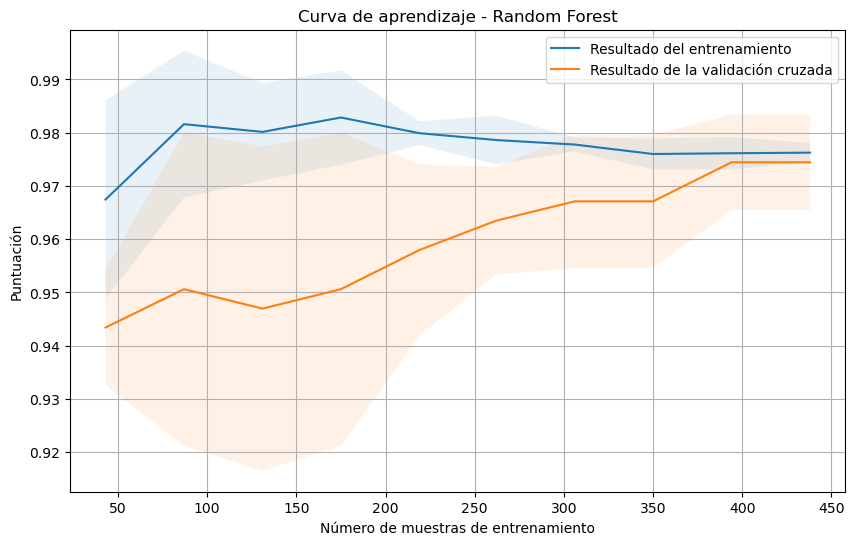

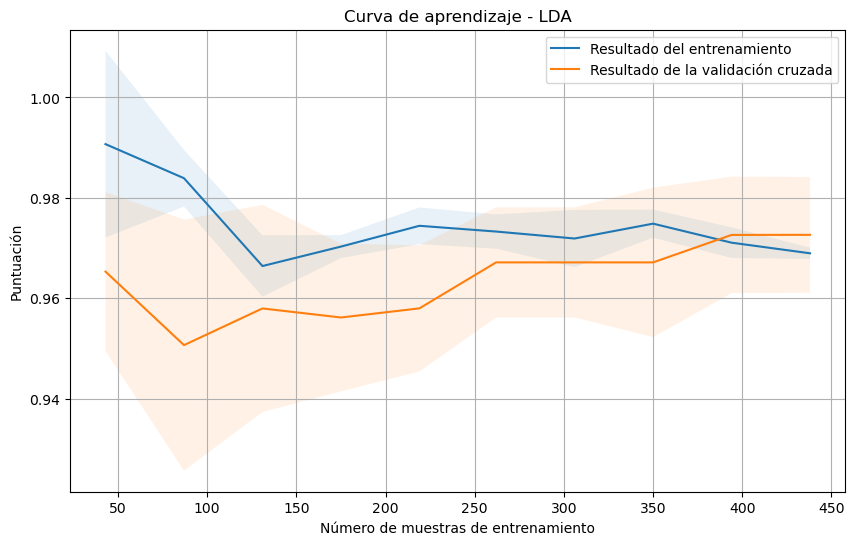

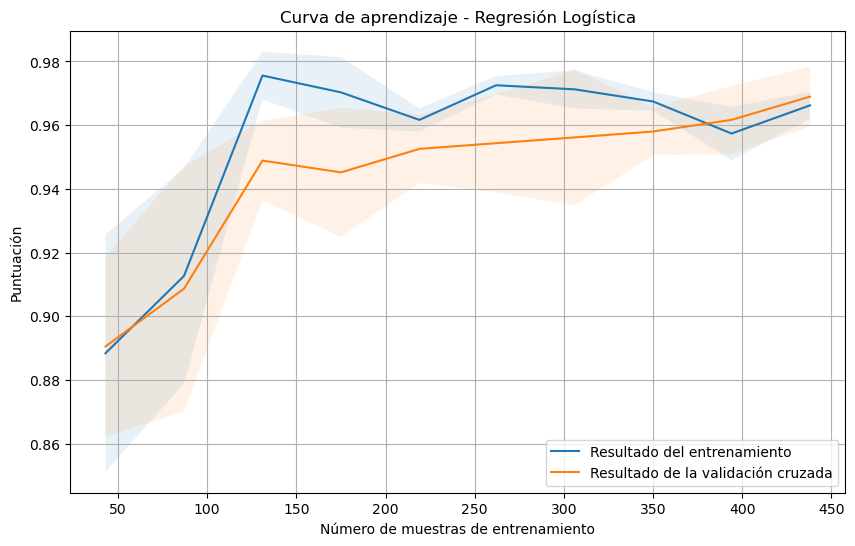

In [28]:
# generamos una curva de aprendizaje para cada modelo
curva_aprendizaje(mejor_modelo_rf, X, y, 'Random Forest')
curva_aprendizaje(mejor_modelo_lda, X, y, 'LDA')
curva_aprendizaje(mejor_modelo_lr, X, y, 'Regresión Logística')

### SHAP

Using 400 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/438 [00:00<?, ?it/s]

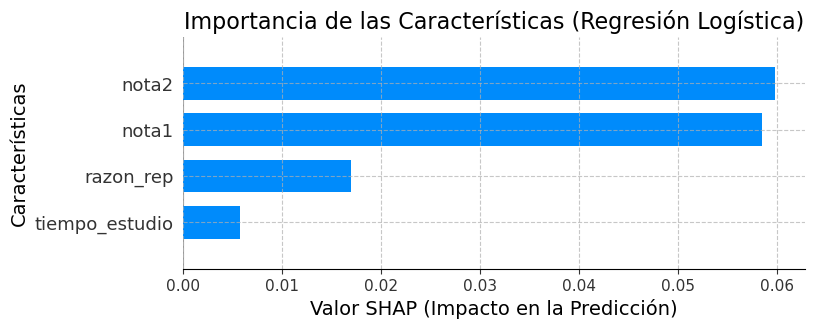

In [29]:
# Valores SHAP 
# Crear un objeto explainer para el mejor modelo usando datos de entrenamiento
X_train_copia = X_train.copy()  # Crear una copia de X_train

# Usar el mejor modelo
if mejor_modelo == 'Random Forest':
	mejor_modelo_copia = mejor_modelo_rf
elif mejor_modelo == 'LDA':
	mejor_modelo_copia = mejor_modelo_lda
elif mejor_modelo == 'Regresión Logística':
	mejor_modelo_copia = mejor_modelo_lr

background = shap.sample(X_train_copia, 400)  # Usamos 400 muestras de entrenamiento para el fondo, son suficientes para obtener una buena aproximación
explainer = shap.KernelExplainer(mejor_modelo_copia.predict, background) # Usamos el mejor modelo, explainer es un objeto que calcula los valores SHAP

# Calcular los valores SHAP
shap_values = explainer.shap_values(X_train_copia)

# Gráfico de resumen
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_train_copia, plot_type='bar', show=False)  # Usamos X_train
plt.title(f'Importancia de las Características ({mejor_modelo})', fontsize=16)
plt.xlabel('Valor SHAP (Impacto en la Predicción)', fontsize=14)
plt.ylabel('Características', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


matriz de confusion

# Explicaciones Contrafactuales (Counterfactual Explanations)

https://github.com/interpretml/DiCE/blob/main/README.rst

I. Stepin, J. M. Alonso, A. Catala and M. Pereira-Fariña, "A Survey of Contrastive and Counterfactual Explanation Generation Methods for Explainable Artificial Intelligence," in IEEE Access, vol. 9, pp. 11974-12001, 2021, doi: 10.1109/ACCESS.2021.3051315.
keywords: {Cognition;Artificial intelligence;Training;Terminology;Taxonomy;Systematics;Signal to noise ratio;Computational intelligence;contrastive explanations;counterfactuals;explainable artificial intelligence;systematic literature review},


https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9321372 
## ¿Qué son las Explicaciones Contrafactuales?

Las explicaciones contrafactuales son una técnica utilizada para entender y explicar las decisiones de los modelos de aprendizaje automático. Estas explicaciones responden a la pregunta "¿Qué tendría que cambiar en la entrada para que la predicción del modelo cambie de una clase a otra?". En otras palabras, las explicaciones contrafactuales identifican las modificaciones mínimas necesarias en las características de una instancia para alterar la predicción del modelo.

## ¿Para qué Sirven en el Proyecto?

En el contexto de nuestro proyecto de clasificación, las explicaciones contrafactuales son especialmente útiles para:

1. **Entender las Decisiones del Modelo**: Nos permiten comprender qué características son más influyentes en las decisiones del modelo. Esto es crucial para asegurar que el modelo esté tomando decisiones basadas en factores relevantes y justos.
2. **Accionabilidad**: Proporcionan información sobre qué cambios específicos en las características podrían llevar a una predicción diferente. Esto es útil para identificar acciones concretas que podrían mejorar las probabilidades de obtener una beca, por ejemplo.
3. **Transparencia y Confianza**: Ayudan a aumentar la transparencia del modelo y la confianza en sus predicciones, ya que podemos ver claramente qué cambios en las características afectan las decisiones del modelo.

## ¿Cómo las Hemos Implementado?

Hemos implementado las explicaciones contrafactuales utilizando la biblioteca `dice-ml` (Diverse Counterfactual Explanations). A continuación, se describen los pasos que seguimos para generar las explicaciones contrafactuales:

### Paso 1: Preparar los Datos

Primero, preparamos los datos de entrenamiento incluyendo la columna de la variable objetivo (`beca`):



In [30]:
# Usar el mejor modelo entrenado
model = mejor_modelo_rf

# Incluir la columna 'beca' en el dataframe de entrenamiento
df_train_beca = X_train.copy()
df_train_beca['beca'] = y_train.values



### Paso 2: Crear el Objeto Data para DiCE

Definimos las características continuas y creamos el objeto `Data` para DiCE:



In [31]:
# Instalar y importar dice-ml
%pip install dice-ml
import dice_ml

# Crear un objeto Data para DiCE
d = dice_ml.Data(dataframe=df_train_beca, 
                 continuous_features=X_train.columns.tolist(), 
                 outcome_name='beca')

Note: you may need to restart the kernel to use updated packages.




### Paso 3: Convertir el Modelo a un Formato Compatible con DiCE

Convertimos el modelo de scikit-learn a un formato compatible con DiCE:



In [32]:
# Convertir el modelo de scikit-learn a un formato compatible con DiCE
backend = 'sklearn'
m = dice_ml.Model(model=model, backend=backend)



### Paso 4: Crear el Objeto Dice

Creamos el objeto **Dice** para generar explicaciones contrafactuales:



In [33]:
from dice_ml import Dice

# Crear un objeto Dice
exp = Dice(d, m, method='random')



### Paso 5: Generar Explicaciones Contrafactuales

Seleccionamos una instancia de prueba y generamos explicaciones contrafactuales:



In [34]:

# Definir la instancia para la cual queremos una explicación contrafactual
instance = pd.DataFrame([X_test.iloc[3]], columns=X_test.columns) # Para cambiar la instancia, cambiar el índice (0, 1, 2, ...) en X_test.iloc[n]

# Generar la explicación contrafactual
dice_exp = exp.generate_counterfactuals(instance, total_CFs=5, desired_class="opposite")

# Mostrar la explicación contrafactual
df_contrafactual = dice_exp.visualize_as_dataframe()
print(df_contrafactual)

100%|██████████| 1/1 [02:48<00:00, 168.14s/it]

Query instance (original outcome : 0)


,tiempo_estudio,nota1,nota2,razon_rep,beca
0,0.070112,0.15833,1.417709,1.839565,0



Diverse Counterfactual set (new outcome: 1)


,tiempo_estudio,nota1,nota2,razon_rep,beca
0,0.070112,0.15833,1.865926,1.839565,1
1,0.070112,0.15833,1.618196,1.839565,1
2,1.271229,0.15833,1.716866,1.839565,1
3,0.070112,0.15833,2.260795,1.839565,1
4,0.234797,0.15833,2.646621,1.839565,1


None


Las explicaciones contrafactuales nos permiten entender mejor las decisiones del modelo, identificar acciones concretas para mejorar las predicciones y aumentar la transparencia y confianza en el modelo. Utilizando la biblioteca `dice-ml`, hemos generado explicaciones contrafactuales de manera efectiva, proporcionando una herramienta poderosa para el análisis y la interpretación de las predicciones del modelo.